<a href="https://colab.research.google.com/github/FFNT/PCD_UTS_202231123_2024_ITPLN/blob/main/UTS_Pengolahan_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Membuat Library

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 2. Membaca gambar

In [ ]:
img = cv2.imread('/content/drive/MyDrive/uts_name.jpeg')


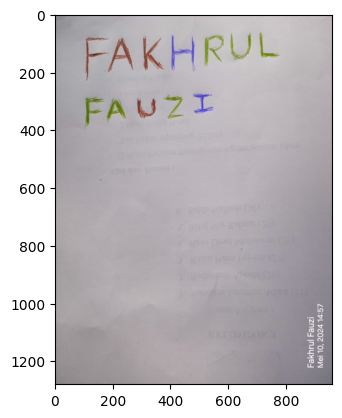

In [ ]:
plt.imshow(img)

# 3. Mengubah format gambar

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

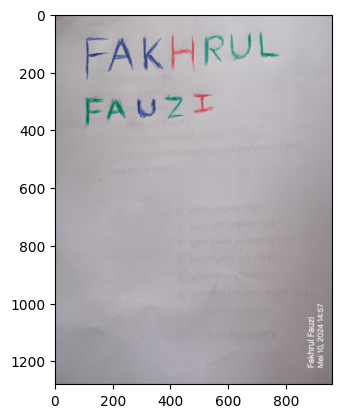

In [ ]:
plt.imshow(img, cmap='gray')

# 4. Pemurnian Warna

In [ ]:
[baris, kolom] = img.shape[:2]

In [ ]:
# Pada kode dibawah dilakukan pemurnian warna dengan mencari elemen warna (R/G/B) dengan intensitas tertinggi, dan warna dengan intensitas kedua tertinggi
# kemudian melakukan pembandingan keduanya dengan mencari selisih antar keduanya dan kemudian menghitung apakah mereka lebih besar dari 10 (kemungkinan bukan putih)
# atau kurang dari 10 (kemungkinan putih), dan apabila warna piksel kemungkinan bukan putih (>10) maka warna-warna lain (selain warna dengan intensitas maksimum)
# akan menjadi 0 (sehingga piksel menjadi warna yang murni R/G/B)

for x in range(baris):
    for y in range(kolom):
        max1=0
        max2=0
        for z in range(3):
            if(max1==0):
                max1=img[x,y,z]
                imax1=z
            elif(max1<img[x,y,z]):
                max2 = max1
                imax2 = imax1

                max1=img[x,y,z]
                imax1=z
            elif(max2<img[x,y,z]):
                max2=img[x,y,z]
                imax2=z
        if((img[x,y,imax1]-img[x,y,imax2])>10):
            for z in range(3):
                if(z!=imax1):
                    img[x,y,z]=0

# 5. Deteksi Warna Pada Citra (Soal 1)

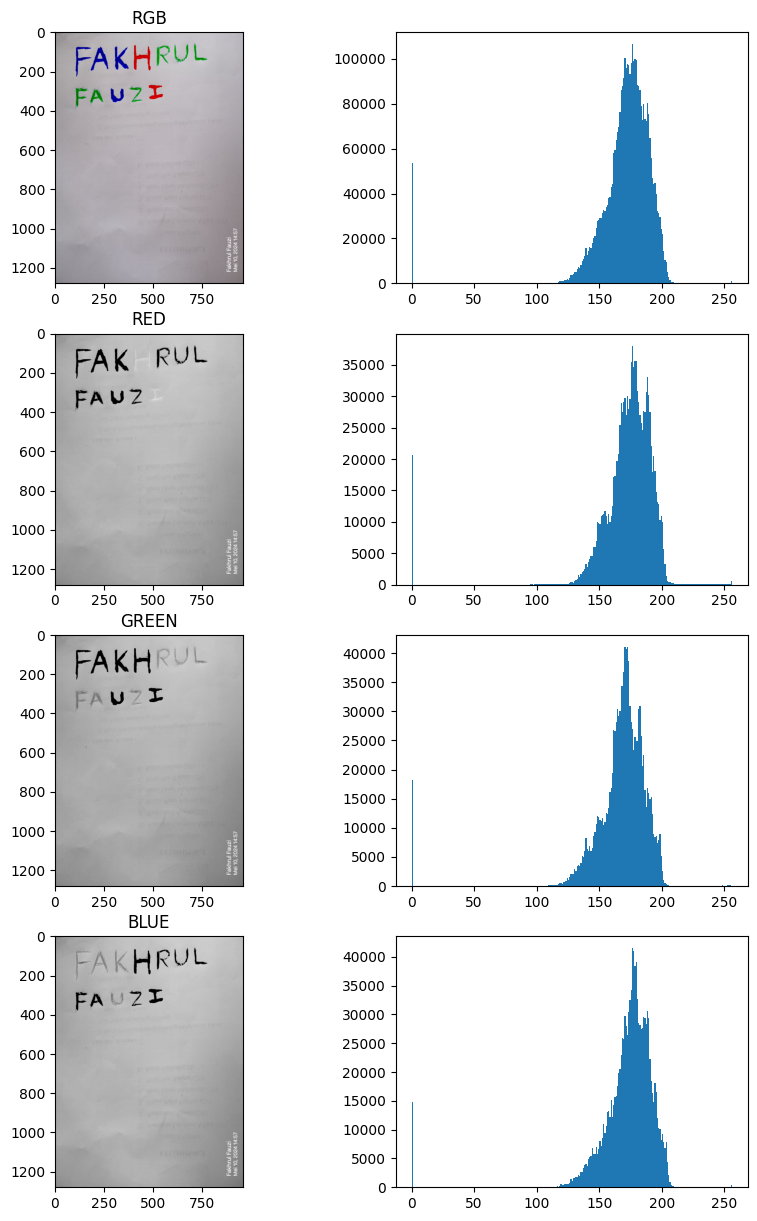

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(10,15))

axs[0,0].imshow(img, cmap='gray')
axs[0,0].set_title('RGB')
axs[0,1].hist(img.ravel(), 256, [0, 256])


axs[1,0].imshow(img[:,:,0], cmap='gray')
axs[1,0].set_title('RED')
axs[1,1].hist(img[:,:,0].ravel(), 256, [0,256])

axs[2,0].imshow(img[:,:,1], cmap='gray')
axs[2,0].set_title('GREEN')
axs[2,1].hist(img[:,:,1].ravel(), 256, [0,256])

axs[3,0].imshow(img[:,:,2], cmap='gray')
axs[3,0].set_title('BLUE')
axs[3,1].hist(img[:,:,2].ravel(), 256, [0,256])

plt.show()

# 6. Ambang Batas (Soal 2)

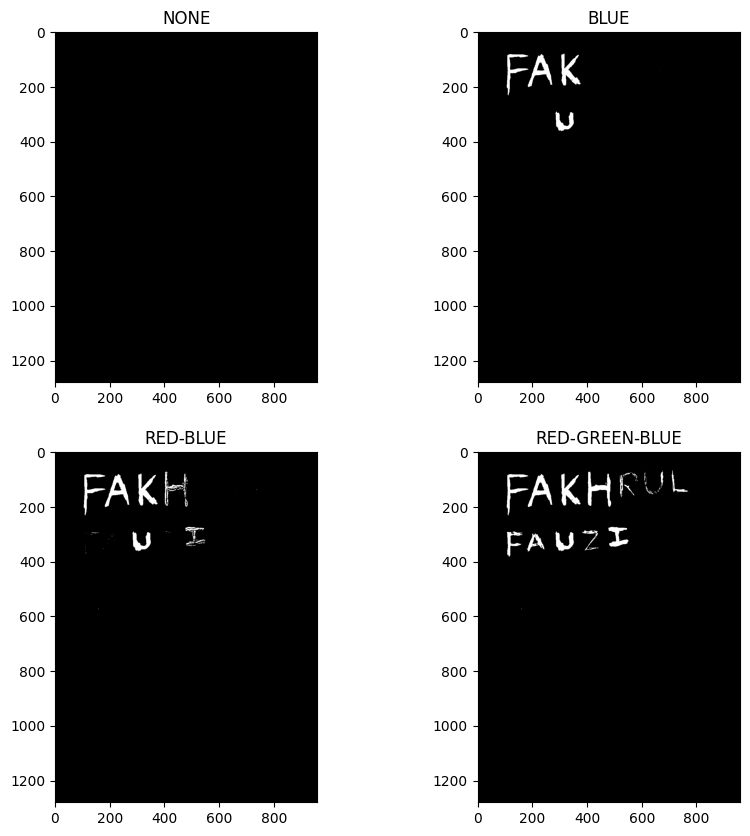

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots(2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap='gray')
axs[0,0].set_title('NONE')

(thresh, binary2) = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
axs[0,1].imshow(binary2, cmap='binary')
axs[0,1].set_title('BLUE')

(thresh, binary3) = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)
axs[1,0].imshow(binary3, cmap='binary')
axs[1,0].set_title('RED-BLUE')

(thresh, binary4) = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
axs[1,1].imshow(binary4, cmap='binary')
axs[1,1].set_title('RED-GREEN-BLUE')

plt.show()